In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import sys
sys.path.insert(0,"../../project_1/src/")
sys.path.insert(0,"../src/")

import NeuralNetwork as NN
from CostFunctions import *
from ActivationFunctions import *
from analysis_utils import *

import utils

from imageio import imread

# Quick and easy way to get rid of sci-kit learns warning messages when
# doing gradient descent.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


utils.plot_settings()  # LaTeX fonts in Plots!

FIGPATH = "../figs/"
FIGURESIZE= np.array([4,3]) # Good default figure size for tex documents

SEEDVAL = 2020

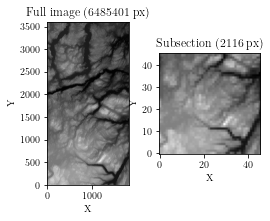

In [2]:
# Setting up the terrain data:
# Note structure! X-coordinates are on the rows of terrain_data
# Point_selection.flatten() moves most rapidly over the x-coordinates
# Meshgrids flattened also move most rapidly over the x-coordinates. Thus
# this should make z(x,y).reshape(length_y,length_x) be consistent with terrain_data

np.random.seed(SEEDVAL)
terrain_data = imread("../../project_1/datafiles/SRTM_data_Norway_1.tif")
point_selection = terrain_data[:1801:40, :1801:40]  # Make quadratic and downsample
x_terrain_selection = np.linspace(0, 1, point_selection.shape[1])
y_terrain_selection = np.linspace(0, 1, point_selection.shape[0])
X_coord_selection, Y_coord_selection = np.meshgrid(x_terrain_selection, y_terrain_selection)
z_terrain_selection = point_selection.flatten()  # the response values
x_terrain_selection_flat = X_coord_selection.flatten()  # the first degree feature variables
y_terrain_selection_flat = Y_coord_selection.flatten()  # the first degree feature variables

x = x_terrain_selection_flat
y = y_terrain_selection_flat
z = z_terrain_selection


x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2)

xy_train = np.array([x_train, y_train]).T
xy_test = np.array([x_test, y_test]).T
xy_full = np.array([x, y]).T

# Centering
z_intercept = np.mean(z)
z = z - z_intercept

z_train_intercept = np.mean(z_train)
z_train = z_train - z_train_intercept
z_test = z_test - z_train_intercept

z_train = z_train.reshape(-1, 1)
z_test = z_test.reshape(-1, 1)
z_full = z.reshape(-1, 1)

# Show the terrain
plt.figure(figsize=FIGURESIZE)
plt.subplot(121)
plt.title(f"Full image ({terrain_data.size} px)")
plt.imshow(terrain_data, cmap="gray", origin="lower")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(122)
plt.imshow(point_selection, cmap="gray", origin="lower")
plt.title(f"Subsection ({point_selection.size} px)")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(FIGPATH+"TerrainData.pdf")
plt.show()

In [3]:
tot_epochs = 100

penalties = np.array([1e-3, 1e-4, 1e-5, 1e-6, 0])
learning_rate = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

N_penalties = len(penalties)
N_learning_rate = len(learning_rate)

Sigmoid_MSE = np.zeros([N_penalties, N_learning_rate])
ReLU_MSE = np.zeros([N_penalties, N_learning_rate])
LeakyReLU_MSE = np.zeros([N_penalties, N_learning_rate])

In [4]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50, 50],
                activation = Sigmoid,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "xavier"
            )

        Sigmoid_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: Xavier


../src/NeuralNetwork.py:229: RuntimeWarning: overflow encountered in matmul
  self.z[l] = self.a[l - 1] @ self.weights[l].T + self.biases[l]
../src/NeuralNetwork.py:234: RuntimeWarning: invalid value encountered in matmul
  self.z[-1] = self.a[-2] @ self.weights[-1].T + self.biases[-1]


Initializing weights using: Xavier


../src/NeuralNetwork.py:229: RuntimeWarning: invalid value encountered in matmul
  self.z[l] = self.a[l - 1] @ self.weights[l].T + self.biases[l]


Initializing weights using: Xavier


../src/NeuralNetwork.py:234: RuntimeWarning: overflow encountered in matmul
  self.z[-1] = self.a[-2] @ self.weights[-1].T + self.biases[-1]


Initializing weights using: Xavier


../src/NeuralNetwork.py:255: RuntimeWarning: overflow encountered in matmul
  self.error[l + 1] @ self.weights[l + 1]
../src/NeuralNetwork.py:255: RuntimeWarning: invalid value encountered in matmul
  self.error[l + 1] @ self.weights[l + 1]
../src/NeuralNetwork.py:263: RuntimeWarning: overflow encountered in matmul
  self.cost_weight_gradient[l] = self.error[l].T @ self.a[l - 1]
../src/NeuralNetwork.py:324: RuntimeWarning: invalid value encountered in multiply
  self.weights[l] * self.momentum
../src/NeuralNetwork.py:329: RuntimeWarning: invalid value encountered in multiply
  self.biases[l] * self.momentum


Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier


../src/NeuralNetwork.py:258: RuntimeWarning: overflow encountered in matmul
  self.cost_weight_gradient[0] = self.error[0].T @ X_mb
../src/NeuralNetwork.py:258: RuntimeWarning: invalid value encountered in matmul
  self.cost_weight_gradient[0] = self.error[0].T @ X_mb
/home/nick/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
../src/NeuralNetwork.py:224: RuntimeWarning: invalid value encountered in matmul
  self.z[0] = X_mb @ self.weights[0].T + self.biases[0]


Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier


../src/NeuralNetwork.py:263: RuntimeWarning: invalid value encountered in matmul
  self.cost_weight_gradient[l] = self.error[l].T @ self.a[l - 1]


Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights

../src/NeuralNetwork.py:268: RuntimeWarning: invalid value encountered in multiply
  self.cost_weight_gradient[l] += self.lambd * self.weights[l]


Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier
Initializing weights using: Xavier


In [5]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50, 50],
                activation = ReLU,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "he"
            )

        ReLU_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initiali

In [6]:
for j in range(N_penalties):
    for k in range(N_learning_rate):
        FFNN_score_func = generate_FFNN_score_func(
                N_minibatches=int(len(xy_train)/32),
                learning_rate = learning_rate[k],
                n_epochs = tot_epochs,
                network_shape = [50, 50, 50],
                activation = LeakyReLU,
                activation_out = ID,
                lambd = penalties[j],
                init_weights_method = "he"
            )

        LeakyReLU_MSE[j,k] = CrossValidation(xy_full, z_full, FFNN_score_func, 5)

Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initializing weights using: He
Initiali

In [11]:
LeakyReLU_MSE

array([[           nan,            nan, 52134.17802175, 51566.46185627,
        52911.50097356],
       [           nan,            nan, 52420.85882001, 51423.49093201,
        52177.49091514],
       [           nan,            nan, 53848.44222667, 51550.60447325,
        52408.08879117],
       [           nan,            nan, 51444.44750765, 51716.02440278,
        53220.64243047],
       [           nan,            nan, 52495.01400852, 51449.97485729,
        51825.22415834]])

In [38]:
penalties

array([1.e-03, 1.e-04, 1.e-05, 1.e-06, 0.e+00])

1

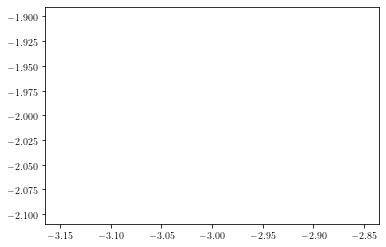

In [40]:
#plt.figure(figsize=(4, 3))
x = np.copy(penalties)
x[:-1] = np.log10(x[:-1])
y = np.log10(learning_rate)

#X, Y = np.meshgrid(np.log10(penalties), np.log10(learning_rate))
plt.contourf(X, Y, LeakyReLU_MSE)
"""
plt.colorbar()
plt.xlabel("$\\log_{10}(\lambda)$")
plt.ylabel("Complexity")
plt.title("MSE")
plt.tight_layout()
plt.savefig(FIGPATH + f"LASSO_CV_Franke_contour_N_{n}.pdf")
"""
1

In [12]:
ReLU_MSE

array([[           nan,            nan, 52297.56668191, 51649.09394608,
        52186.1546513 ],
       [           nan,            nan, 53015.75186428, 51658.59739899,
        53538.95881913],
       [           nan,            nan, 51737.92948299, 51688.50081584,
        52012.74566596],
       [           nan,            nan, 52525.95629145, 51657.18003279,
        52000.45320999],
       [           nan,            nan, 53339.43043695, 51368.32550793,
        52282.83371445]])

In [13]:
Sigmoid_MSE

array([[           nan,            nan, 52401.95663521, 51345.46372913,
        71418.626792  ],
       [           nan,            nan, 51600.37361932, 51564.40003708,
        71490.16165005],
       [           nan,            nan, 52251.35527346, 51460.55497626,
        71395.5955626 ],
       [           nan,            nan, 52526.59174372, 51554.38216542,
        71433.65324013],
       [           nan,            nan, 51982.96909023, 51393.06317474,
        71444.58107875]])